In [61]:
%matplotlib inline
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
import matplotlib as mpl
from hdf5manager import hdf5manager as h5
from pandas import pandas as pd
from pandas import DataFrame
from skimage.measure import label, regionprops
import scipy
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage
from scipy.ndimage.filters import gaussian_filter, convolve
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
from scipy.ndimage.filters import maximum_filter
from scipy.stats import multivariate_normal as mvn
from scipy.spatial.distance import cdist
from skimage.morphology import disk, watershed
from skimage.morphology import erosion, dilation, opening, closing
from opticFlow import opticFlow as of
import colorsys
import wholeBrain as wb
from waveletAnalysis import waveletAnalysis as wave
from timecourseAnalysis import *
import sys
sys.path.append("..")
from BehavioralClassify import * 
import cv2
import os
import seaborn as sns
from time import time
from sklearn.preprocessing import StandardScaler

In [55]:
path = '/Users/emmadionne/Documents/'
file = '170721_07_c1_gridOpticFlow_metrics.csv'
tsv_output_file = path + file
data_big = pd.DataFrame.from_csv(tsv_output_file)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [56]:
%matplotlib inline
col_list = list(data_big)
#puts the paramter on a scale of 0 to 1
data_big = data_big.copy()
data_big -= data_big.min()
data_big /= data_big.max()
data_big = data_big.fillna(value=0)

In [57]:
indices_big = np.zeros(len(data_big))
indices_big[2445 : 3388] = 1
indices_big[5166 : 5569] = 1
indices_big[8617 : 9298] = 1
indices_big[11751 : 12024] = 1
indices_big[15367 : 15889] = 1
indices_big[17619 : 17964] = 1
data_big['classification'] = indices_big

In [67]:
value = smooth(data_big["mov.mean"], 30, win_type = "han")
distance = findingDistanceBetweenMaxOfEvent(value)
final_distance = 17999 - len(distance)
for i in range(final_distance):
    distance.append(0)
var = pd.DataFrame()
# var["mov.diffmaxevents"] = scaler.transform(data_big["mov.diffmaxevents"])#distance
# var["brain.data"] = scaler.transform(data_big["brain.data"])
# var["brain.rangemaxmin"] = scaler.transform(data_big["brain.rangemaxmin"])
# var["diff.brainmov"] = scaler.transform(data_big["diff.brainmov"])#comparison(data_big["mov.mean"], data_big["brain.data"])
# var["mov.mean"] = scaler.transform(data_big["mov.mean"])#value

var["mov.diffmaxevents"] = data_big["mov.diffmaxevents"]
var["brain.data"] = data_big["brain.data"]
var["brain.rangemaxmin"] = data_big["brain.rangemaxmin"]
var["diff.brainmov"] = data_big["diff.brainmov"]
var["mov.mean"] = data_big["mov.mean"]
#brain data, movemnet between rest, duration, angles standard deviation
scaler = StandardScaler()

print(scaler.fit(var))
print(scaler.transform(var))

print(var.columns)
var_names = []
var_names = ["mov.diffmaxevents", "brain.data", "brain.rangemaxmin", "diff.brainmov", "mov.mean"]
var_names.append("classification")



o_var = pd.DataFrame()
o_var["mov.mean"] = data_big["mov.mean"]
o_var["mov.surfarea"] = data_big["mov.surfarea"]
o_var["mov.diffxystd"] = data_big["mov.diffxystd"]
o_var["mov.diffmaxevents"] = data_big["mov.diffmaxevents"]
o_var["brain.data"] = data_big["brain.data"]
o_var["diff.brainmov"] = data_big["diff.brainmov"]
o_var["brain.eventrest"] = data_big["brain.eventrest"]
o_var["mov.timetoevent"] = data_big["mov.timetoevent"]
o_var["mov.timefromevent"] = data_big["mov.timefromevent"]

o_var_names = ["mov.mean", "mov.surfarea", "mov.diffxystd", "mov.diffmaxevents", "brain.data", "diff.brainmov", "brain.eventrest", "mov.timetoevent", "mov.timefromevent"]

entered the findingDistanceBetweenMaxOfEvent function
entered the findMeans function
entered the findEvent function
entered the findMeans function
StandardScaler(copy=True, with_mean=True, with_std=True)
[[  7.28490317  -0.47357732  -0.54343611  -0.42652359   0.40487264]
 [ -0.19442735  -0.47357732  -0.54343611   0.08694291  -0.13943013]
 [ -0.19442735  -0.47357732  -0.54343611   0.08694291  -0.13943013]
 ...
 [ -0.19442735  -1.65899032  -0.56756836 -17.86432738   3.26104475]
 [ -0.19442735  -1.65899032  -0.56756836 -17.86432738   1.11785258]
 [ -0.19442735  -1.65899032  -0.56756836 -17.86432738   0.56787999]]
Index(['mov.diffmaxevents', 'brain.data', 'brain.rangemaxmin', 'diff.brainmov',
       'mov.mean'],
      dtype='object')


In [51]:
def plot_classification(data, indices, color):
    fig = plt.figure(figsize = (20, 2))
    colors_list = ["violet", "magenta", "teal", "silver", "salmon", "pink"]
    num_color = 0;
    if (len(np.unique(indices)) > 2):
        for i in range(len(indices)):
            if (indices[i] == 0):
                plt.axvline(x = i, color = 'blue', alpha = 0.01)
            elif (indices[i] == 1):
                plt.axvline(x = i, color = 'orange')
            elif (indices[i] == 2):
                plt.axvline(x = i, color = 'green')
            elif (indices[i] == 3 ):
                plt.axvline(x = i, color = 'purple', alpha = 0.1)
            else:
                if (num_color == len(colors_list)):
                    num_color = 0
                else:
                    plt.axvline(x = i, color = colors_list[num_color], alpha = 0.01)
                    num_color += num_color
                
    else:
        for i in range(len(indices)):
            if (indices [i] == 0):
                plt.axvline(x = i, color = 'purple', alpha = 0.01)
            elif (indices [i] == 1):
                plt.axvline(x = i, color = 'yellow', alpha = 0.1)
    
    plt.plot(data, color)
    plt.plot(indices/2)

## t-SNE Dimension Reduction

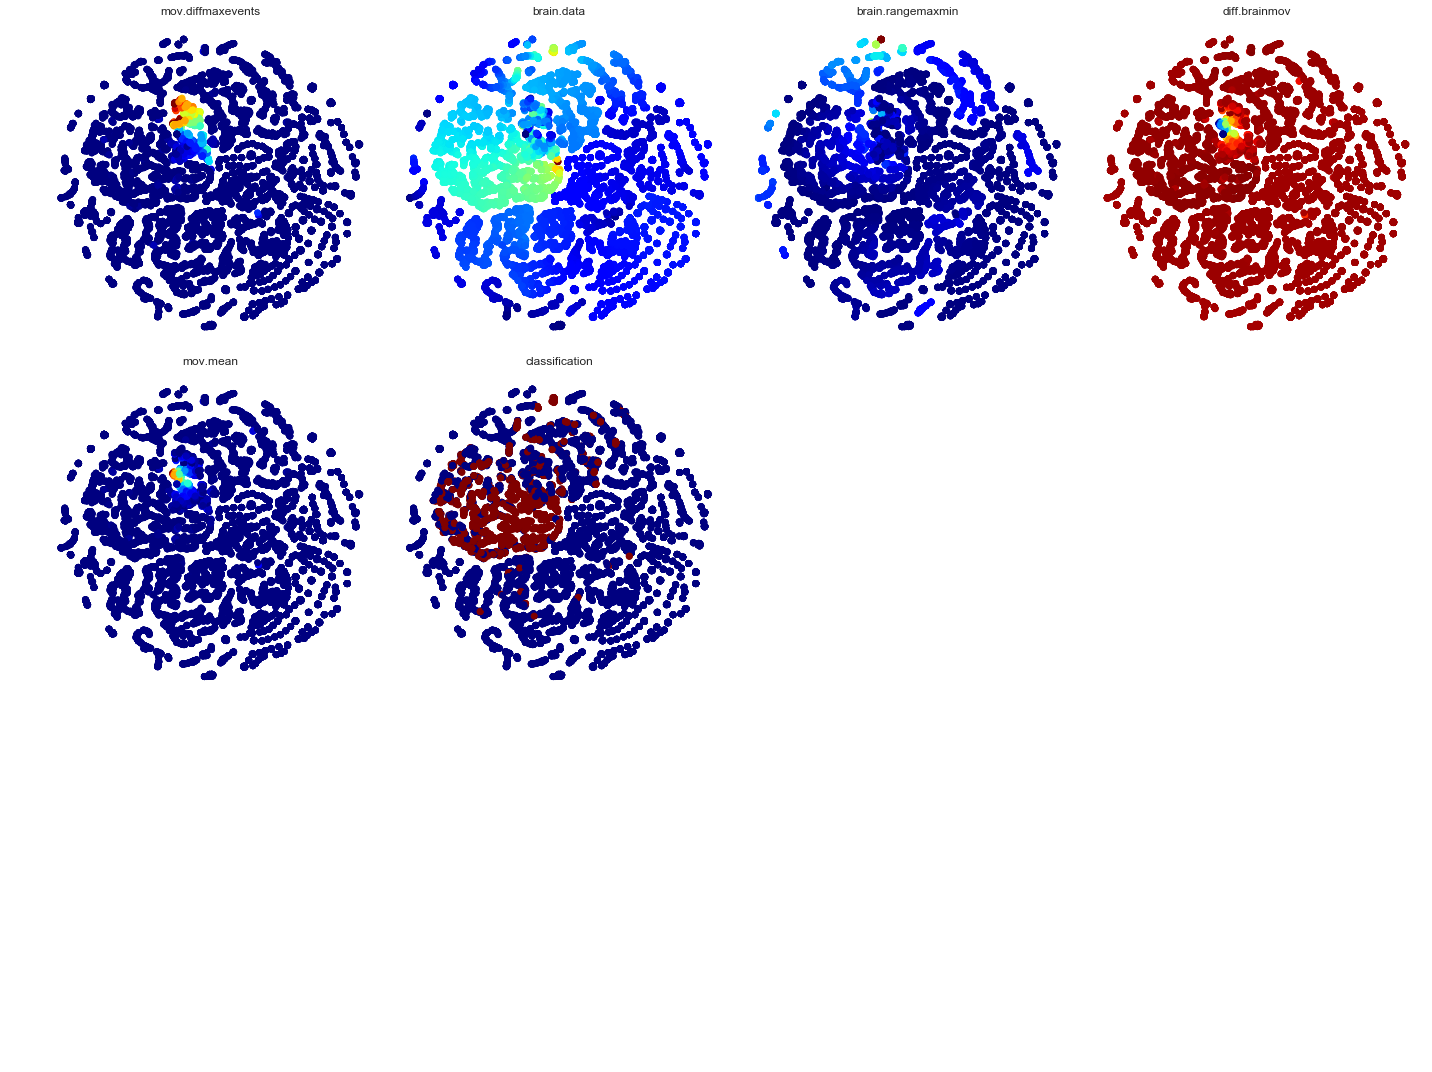

In [68]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(var)

fig, ax = plt.subplots(3, 4, figsize = (20, 15), sharex = True, sharey = True)
k = 0
for i in range(3):
    for j in range(4):
        if k != len(var_names):
            if var_names[k] == "classification":
                ax[i][j].scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=data_big[var_names[k]], cmap='jet')
                ax[i][j].title.set_text('{0}'.format(var_names[k]))
                ax[i][j].axis('off')
                k += 1
            else:
                ax[i][j].scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=var[var_names[k]], cmap='jet')
                ax[i][j].title.set_text('{0}'.format(var_names[k]))
                ax[i][j].axis('off')
                k += 1
        else:
            pass
            ax[i][j].axis('off')
plt.tight_layout()
plt.show()

### Kmeans Clustering

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

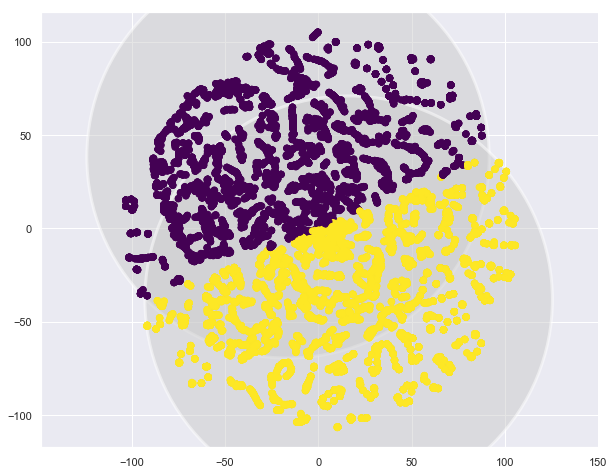

In [15]:
kmeans = KMeans(n_clusters= 2, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(X_reduced_tsne)
prediction = kmeans.predict(X_reduced_tsne)

colors = ["blue", "red", "orange", "yellow", "green", "purple"]

plt.figure(figsize = (10,8))
def plot_kmeans(kmeans, X, n_clusters=2, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
    return labels

indices_tsne = kmeans.fit_predict(X_reduced_tsne)
plot_kmeans(kmeans, X_reduced_tsne)

### Birch Clustering

In [13]:
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch

Text(0.5, 1.0, 'Birch clustering of Data Big')

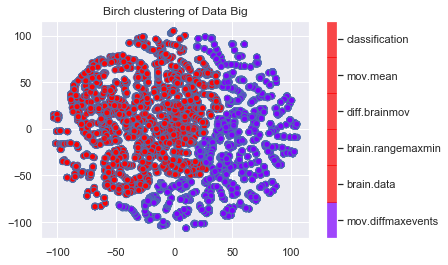

In [16]:
brc = Birch(branching_factor = 50, n_clusters = 2, threshold= 1.5)
brc.fit(X_reduced_tsne)
labels = brc.predict(X_reduced_tsne)
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')
cbar = plt.colorbar(boundaries=np.arange(7)-0.5)
cbar.set_ticks(np.arange(7))
cbar.set_ticklabels(var_names)
plt.title("Birch clustering of Data Big")

## Isomap Dimension Reduction

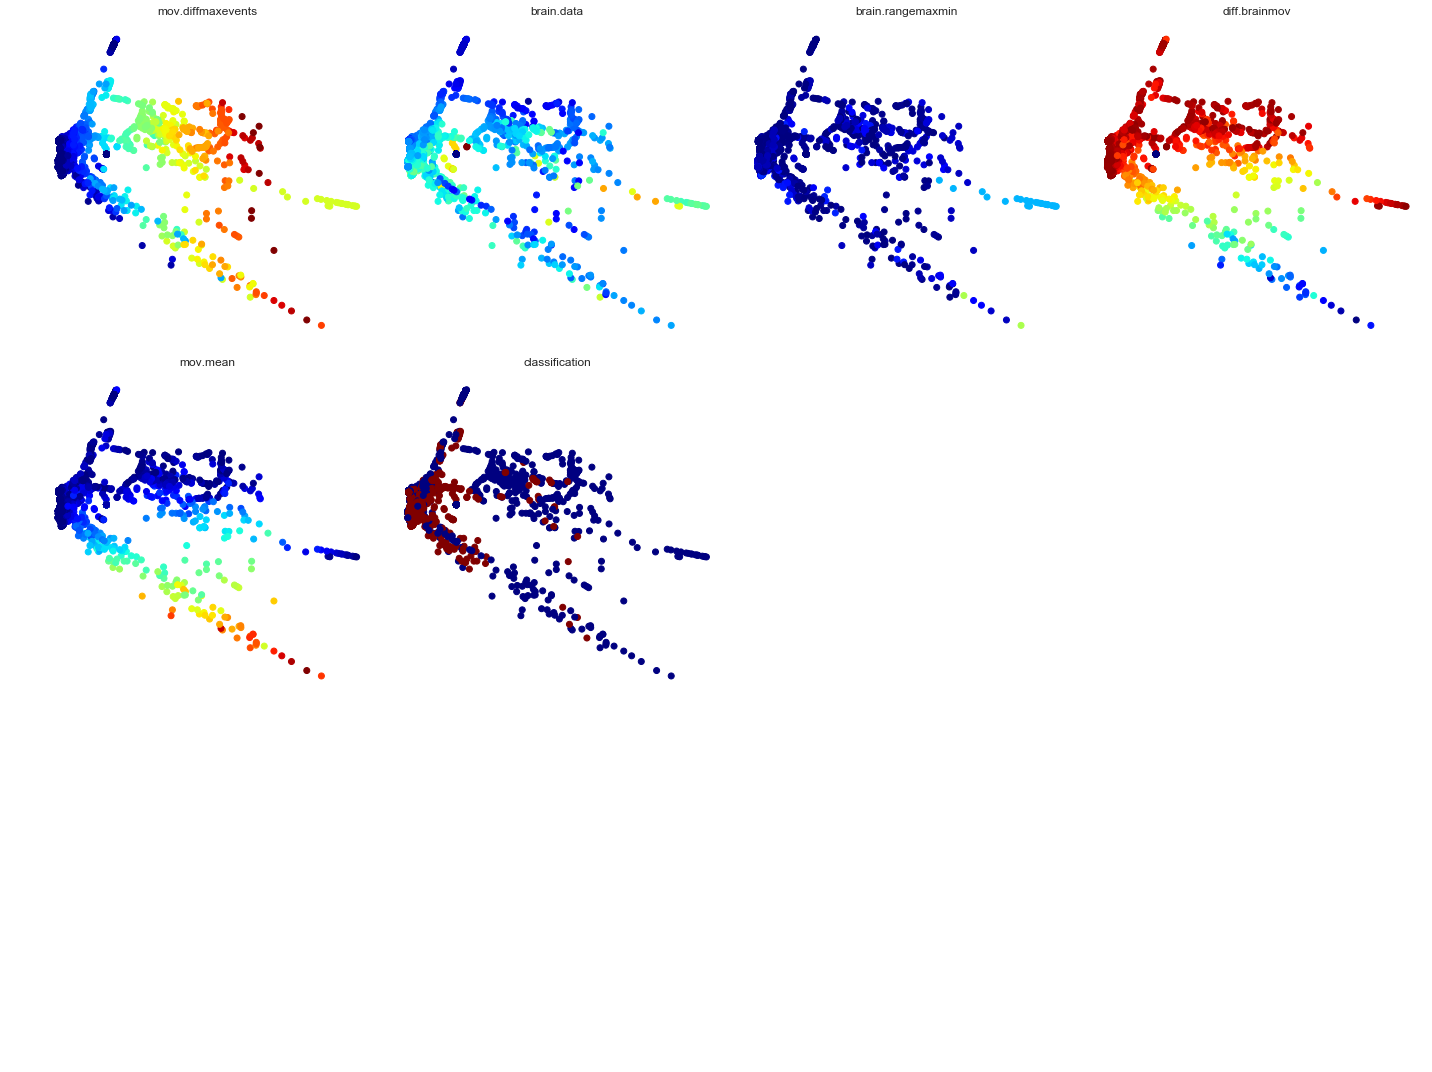

In [69]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(var)

fig, ax = plt.subplots(3, 4, figsize = (20, 15), sharex = True, sharey = True)
k = 0
for i in range(3):
    for j in range(4):
        if k != len(var_names):
            if var_names[k] == "classification":
                ax[i][j].scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1], c=data_big[var_names[k]], cmap='jet')
                ax[i][j].title.set_text('{0}'.format(var_names[k]))
                ax[i][j].axis('off')
                k += 1
            else:
                ax[i][j].scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1], c=var[var_names[k]], cmap='jet')
                ax[i][j].title.set_text('{0}'.format(var_names[k]))
                ax[i][j].axis('off')
                k += 1
        else:
            pass
            ax[i][j].axis('off')
plt.tight_layout()
plt.show()

### Kmeans Clustering

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

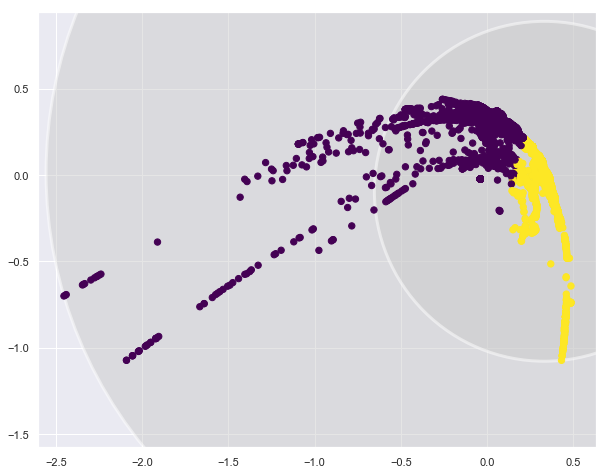

In [21]:
kmeans = KMeans(n_clusters= 2, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(X_reduced_isomap)
prediction = kmeans.predict(X_reduced_isomap)

colors = ["blue", "red", "orange", "yellow", "green", "purple"]

plt.figure(figsize = (10,8))
def plot_kmeans(kmeans, X, n_clusters=2, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
    return labels

indices_isomap = kmeans.fit_predict(X_reduced_isomap)
plot_kmeans(kmeans, X_reduced_isomap)

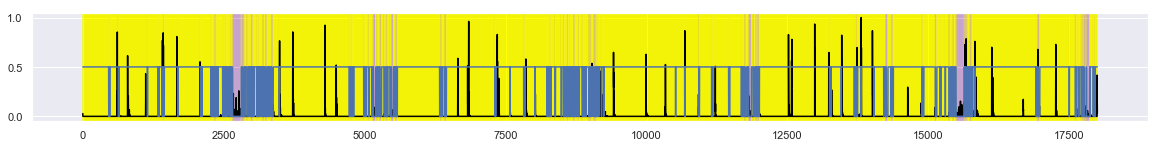

In [22]:
plot_classification(data_big["mov.mean"], indices_isomap, "black")

### Birch Clustering

In [18]:
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch

/anaconda3/lib/python3.7/site-packages/sklearn/cluster/birch.py:629: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:1042: RuntimeWarning: invalid value encountered in true_divide
  z = np.take(y, i0) + (xn - np.take(b, i0)) * dy / db


Text(0.5, 1.0, 'Birch clustering of Data Big')

/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:402: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]


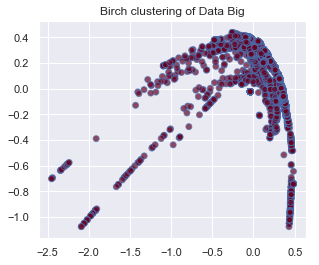

In [32]:
brc = Birch(branching_factor = 50, n_clusters = 2, threshold= 1.5)
brc.fit(X_reduced_isomap)
labels = brc.predict(X_reduced_isomap)
plt.scatter(X_reduced_isomap[:,0], X_reduced_isomap[:,1], c=labels, cmap='RdBu', alpha=0.7, edgecolors='b')
cbar = plt.colorbar(boundaries=np.arange(7)-0.5)
cbar.set_ticks(np.arange(7))
cbar.set_ticklabels(var_names)
plt.title("Birch clustering of Data Big")

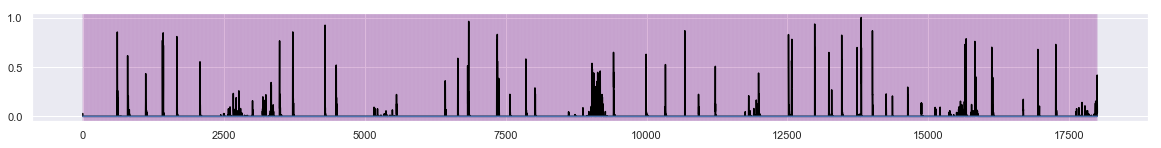

In [29]:
plot_classification(data_big["mov.mean"], labels, "black")

## UMAP Dimension Reduction

In [9]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from umap import UMAP

/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 550 separate connected components using meta-embedding (experimental)
  n_components


CPU times: user 38.9 s, sys: 976 ms, total: 39.9 s
Wall time: 36.5 s


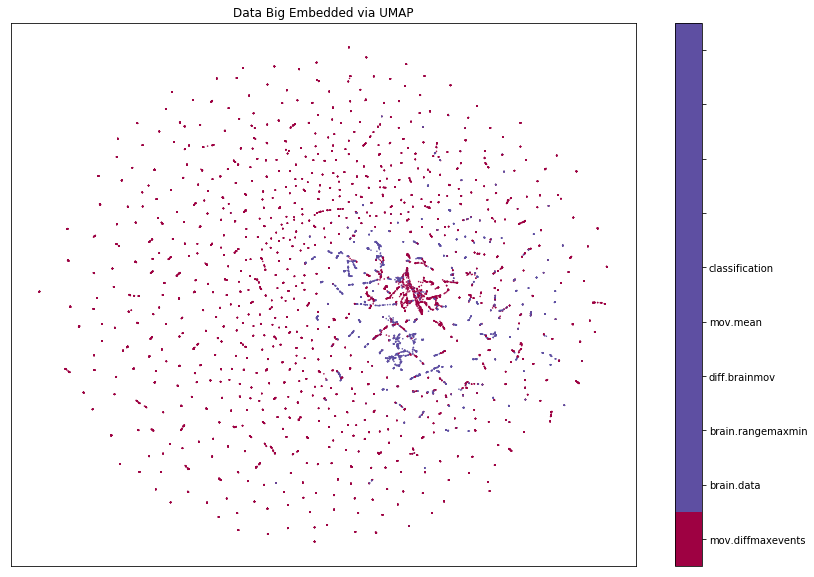

In [10]:
%%time
embedding = umap.UMAP(n_neighbors=10).fit_transform(var)
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, c=data_big["classification"], cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(11))
cbar.set_ticklabels(var_names)
plt.title('Data Big Embedded via UMAP');

In [11]:
reducer = umap.UMAP(random_state=42)
reducer.fit(var)
embedding = reducer.transform(var)
assert(np.all(embedding == reducer.embedding_))
embedding.shape
print(embedding)

/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 378 separate connected components using meta-embedding (experimental)
  n_components


[[  4.6835217    1.0971363 ]
 [  4.6414948    1.0695279 ]
 [  4.6518655    1.0678188 ]
 ...
 [ -0.18895362 -15.202453  ]
 [ -0.19198565 -15.202675  ]
 [ -0.19094181 -15.203643  ]]


0
1
2
3
4
5
6
6
6
6
6
6


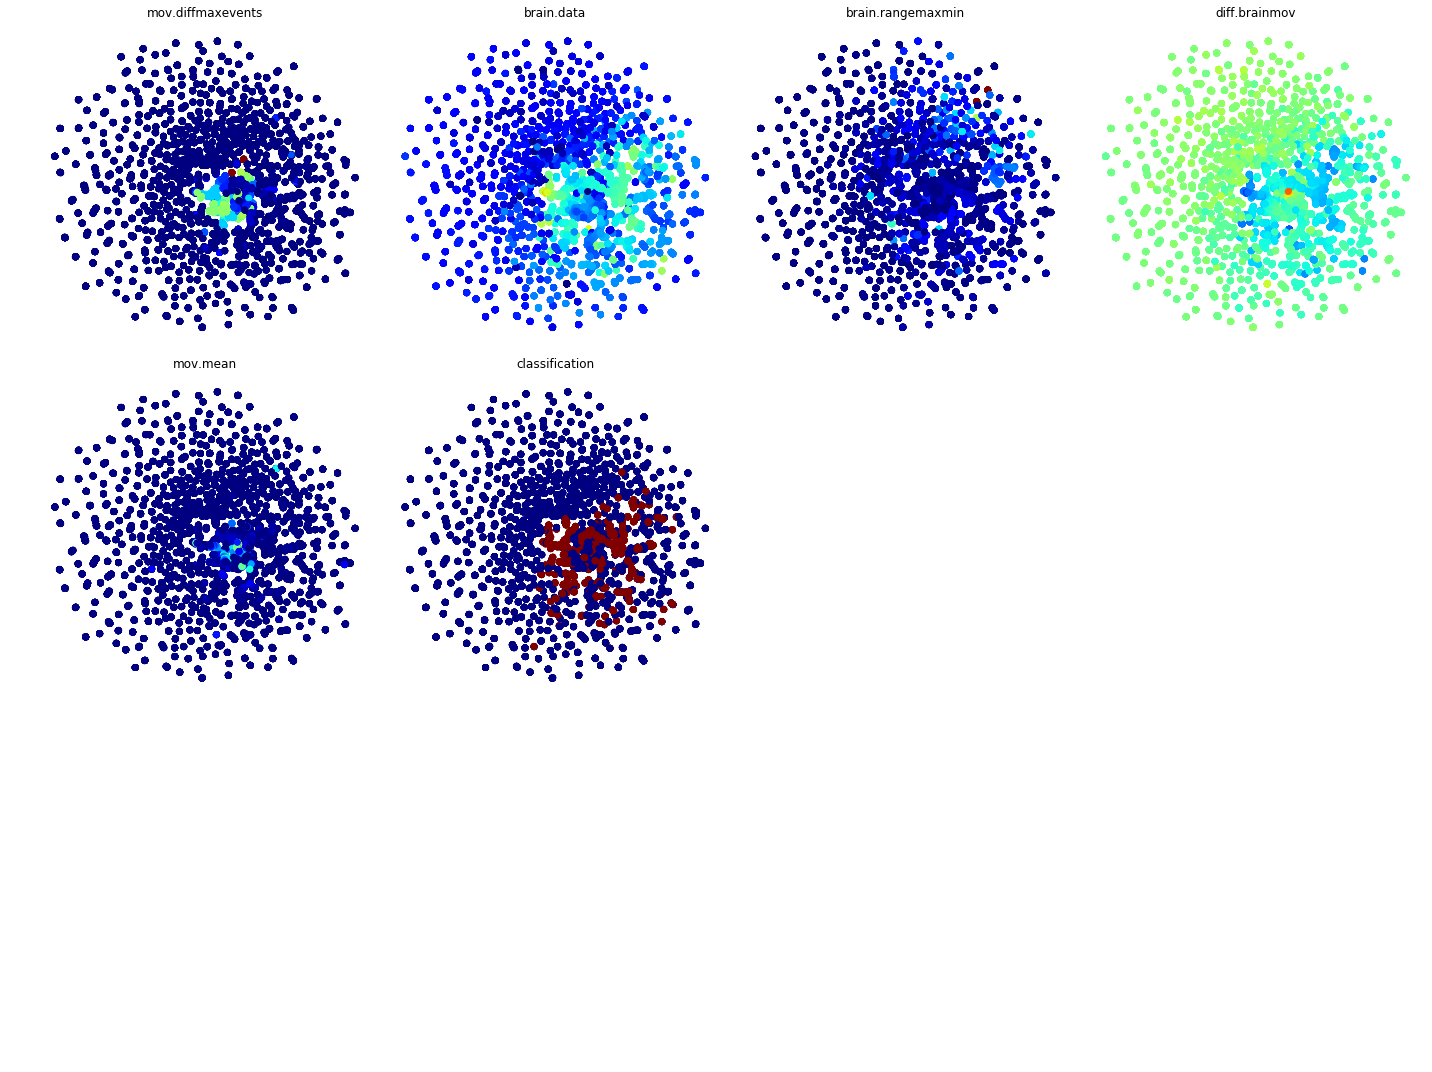

In [12]:
fig, ax = plt.subplots(3, 4, figsize = (20, 15), sharex = True, sharey = True)
k = 0
for i in range(3):
    for j in range(4):
        print(k)
        if k != len(var_names):
            if var_names[k] == "classification":
                ax[i][j].scatter(embedding[:, 0], embedding[:, 1], c=data_big[var_names[k]], cmap='jet')
                ax[i][j].title.set_text('{0}'.format(var_names[k]))
                ax[i][j].axis('off')
                k += 1
            else:
                ax[i][j].scatter(embedding[:, 0], embedding[:, 1], c=var[var_names[k]], cmap='jet')
                ax[i][j].title.set_text('{0}'.format(var_names[k]))
                ax[i][j].axis('off')
                k += 1
        else:
            pass
            ax[i][j].axis('off')
plt.tight_layout()
plt.show()

### Kmeans Clustering

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

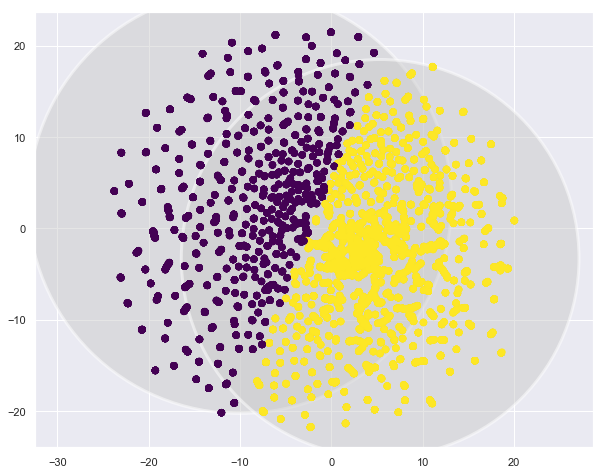

In [23]:
kmeans = KMeans(n_clusters= 2, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(embedding)
prediction = kmeans.predict(embedding)

colors = ["blue", "red", "orange", "yellow", "green", "purple"]

plt.figure(figsize = (10,8))
def plot_kmeans(kmeans, X, n_clusters=2, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
    return labels

indices_isomap = kmeans.fit_predict(embedding)
plot_kmeans(kmeans, embedding)

### Birch Clustering

In [24]:
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch

Text(0.5, 1.0, 'Birch clustering of Data Big')

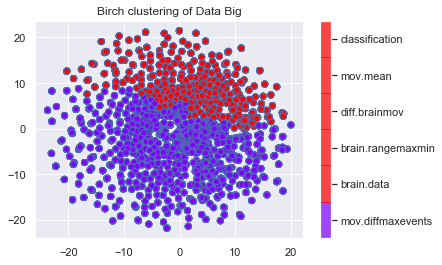

In [26]:
brc = Birch(branching_factor = 50, n_clusters = 2, threshold= 1.5)
brc.fit(embedding)
labels = brc.predict(embedding)
plt.scatter(embedding[:,0], embedding[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')
cbar = plt.colorbar(boundaries=np.arange(7)-0.5)
cbar.set_ticks(np.arange(7))
cbar.set_ticklabels(var_names)
plt.title("Birch clustering of Data Big")